<h1 style="text-align: center;">Midterm Project</h1>
<h1 style="text-align: center;">Craft Beer Bar Sales Analysis</h1>
<p>(This project study about the sales of a beer bar, which is a saloon in Russia)</p>


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Phần I, II, câu 2 phần III|100%
|Nguyễn Huy Hoàn|20127166|Phần I, II , câu 1 phần III|100%
|Bùi Thanh Lâm|20127402|Phần I, II, câu 2 phần III|100%
|Đào Ngọc Hoa|20127500|Phần I, II , câu 1 phần III|100%
|Võ Thanh Lâm|20127546|Phần I, II, câu 2 phần III|100%

<a class="anchor" id="1"></a>
## I. Collecting data 
**General: Collecting data on Kaggle**


# About Dataset
**Bar history:**
> In the spring of 2016, we decided to open a beer bar that would be fun to return to for many years. To do this, we have done a lot of work. There are 30 taps on the board on the board of interesting beer from European, American and Russian new wave breweries, shelves and refrigerators for three hundred bottles, as well as the best cheese from regional cheese makers. In December of the same year, Nelson Sauvin opened - a spacious and cozy two-story bar with large windows in the very center of Yekaterinburg. The bar is open not only for experimental and Untappd check-ins, but also for Friday hangouts, dates or meeting with grandma. 🎉🎉🎉 In addition, we are engaged in the import of beer, which, in our opinion, is not enough in Russia.

For more information, visit website: https://www.kaggle.com/datasets/podsyp/sales-in-craft-beer-bar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Products dataset

In [2]:
products_df = pd.read_csv('data/Product_range.csv',index_col='Product_code')
products_df.head(5)

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6
4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5


**The number of rows and columns**

In [3]:
rows, cols = products_df.shape
rows, cols

(5314, 7)

**This bar club have 5314 different products, with their infomation as follow:**

|Atrribute|Meanings
| :------ | ---
|Vendor_code|The time that a student fill the form
|Name|The gender of a student
|Retail_price|The age of a student
|Base_unit|The course that a student is participating
|Country_of_Origin|The current year of a student
|Size|The current GPA of a student
|ABV|Whether a student married or not

In [4]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 5028 to 1682
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vendor_code        4288 non-null   object 
 1   Name               5314 non-null   object 
 2   Retail_price       4878 non-null   float64
 3   Base_unit          4910 non-null   object 
 4   Country_of_Origin  4205 non-null   object 
 5   Size               4626 non-null   float64
 6   ABV                4622 non-null   float64
dtypes: float64(3), object(4)
memory usage: 332.1+ KB


*There are no column having inappropriate data types.*

# Preprocessing

**Values distribution of Numeric columns**

In [5]:
df = products_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,4878.0,637.839502,504.895006,1.00,350.00,520.0,730.0,8484.85,8.2
Size,4626.0,0.626917,0.953290,0.15,0.33,0.5,1.0,30.00,12.9
ABV,4622.0,7.074273,2.457970,0.50,5.30,6.5,8.2,21.00,13.0


**Retail_price**

In [6]:
df = products_df[products_df['Retail_price'].isna()]
df.head()

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4602,NaN,Lambik Bar,NaN,NaN,NaN,NaN,NaN
3488,NaN,Honey,NaN,NaN,NaN,NaN,NaN
3041,NaN,2Y,NaN,NaN,NaN,NaN,NaN
4728,4 Brewers,4Brewers,NaN,NaN,Russia,NaN,NaN


In [7]:
df1 = df.describe().T
df1['missing_percentage'] = ((1-df1['count']/len(df)) * 100).round(1)
df1

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Size,6.0,5.568333,11.972822,0.33,0.435,0.875,1.0,30.0,98.6
ABV,5.0,6.940000,1.957805,5.00,5.500,6.900,7.3,10.0,98.9


As we see, with products having null `Retail_price`, the `missing_percentage` of `Size` and `ABV` are quitely high, so we decided to remove these products.

In [8]:
products_df.dropna(subset=['Retail_price'], inplace = True)

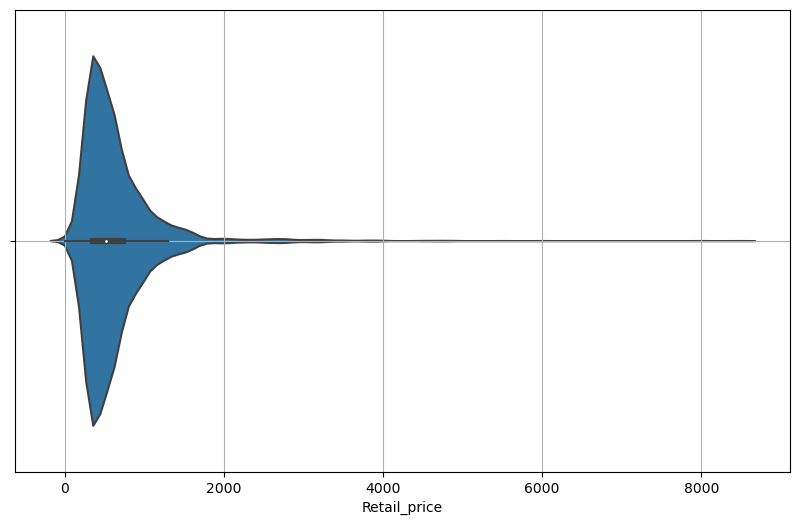

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(x=products_df['Retail_price'])
plt.grid()
plt.show()

**Values distribution of Numeric columns after removing products having null `Retail_price`**

In [10]:
df = products_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(products_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,4878.0,637.839502,504.895006,1.00,350.00,520.0,730.0,8484.85,0.0
Size,4620.0,0.620500,0.850300,0.15,0.33,0.5,1.0,30.00,5.3
ABV,4617.0,7.074418,2.458621,0.50,5.30,6.5,8.2,21.00,5.4


**Size**

Because our analysis would not care so deeply about this attribute, it is fine.

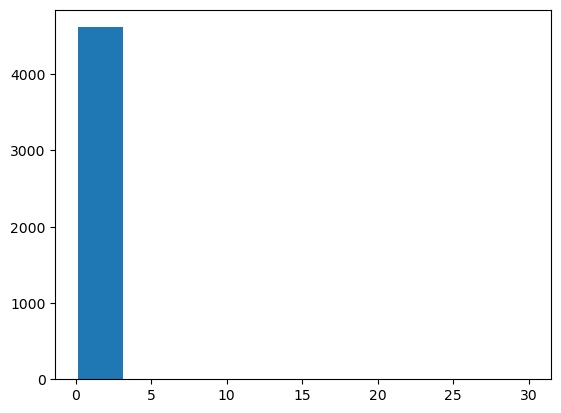

In [11]:
plt.hist(products_df['Size'])
plt.show()

**ABV**

Due to the null value, we decided to replace it by the median.

In [12]:
products_df.fillna(df.loc['ABV','50%'], inplace = True)

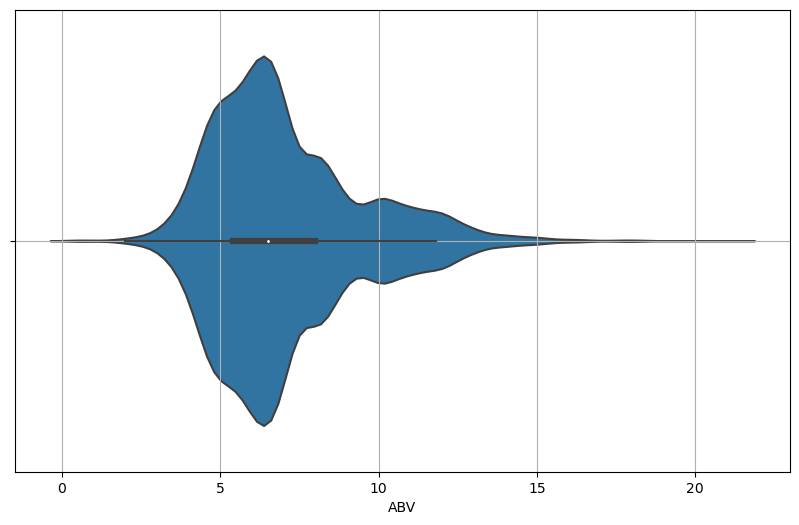

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x = products_df['ABV'])
plt.grid()
plt.show()

**Values distribution of Catergorial columns**

In [14]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = products_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(products_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Vendor_code,Name,Base_unit,Country_of_Origin
missing_percentage,0.0,0.0,0.0,0.0
num_values,272,4830,4,29
value_percentages,"{6.5: 14.4, 'AF Brew': 5.0, 'To Ol': 3.1, 'Zagovor': 3.0, 'Mikkeller': 2.9, 'Jaws': 2.8, 'BrewDo...","{'Kees Barrel Project 19.0.33': 0.1, 'Bakunin Ruka Boga 0.5': 0.0, 'Jaws Populism Idarado Editio...","{'Pieces': 71.2, 'Liters': 28.7, 'Kilogram': 0.0, '100g': 0.0}","{'Russia': 33.0, 6.5: 16.1, 'USA': 7.7, 'Sweden': 7.1, 'Belgium': 6.7, 'Netherlands': 5.2, 'Denm..."


Overall, it is interesting that the mising percentage of all catergorical columns are 0.0%, and there are no abnormal data we need to consider and preprocess.

## Transactions

In [15]:
transactions_df = pd.read_csv('data/Transactions.csv')
transactions_df

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02
...,...,...,...,...,...,...,...,...
50079,2022-09-18 15:00:00,5316,6.0,1875.95,104.05,1095.95,140.51,5.26
50080,2022-09-18 15:00:00,5317,2.0,555.95,104.05,315.95,131.65,15.77
50081,2022-09-18 15:00:00,5318,2.0,572.50,87.50,312.50,120.19,13.26
50082,2022-09-18 15:00:00,5321,1.0,300.00,NaN,180.00,150.00,NaN


In [16]:
transactions_df['Month'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.month

In [17]:
transactions_df['Year'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.year

In [18]:
transactions_df['day_of_week'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.dayofweek

In [42]:
df = transactions_df[transactions_df['Month'] <10]

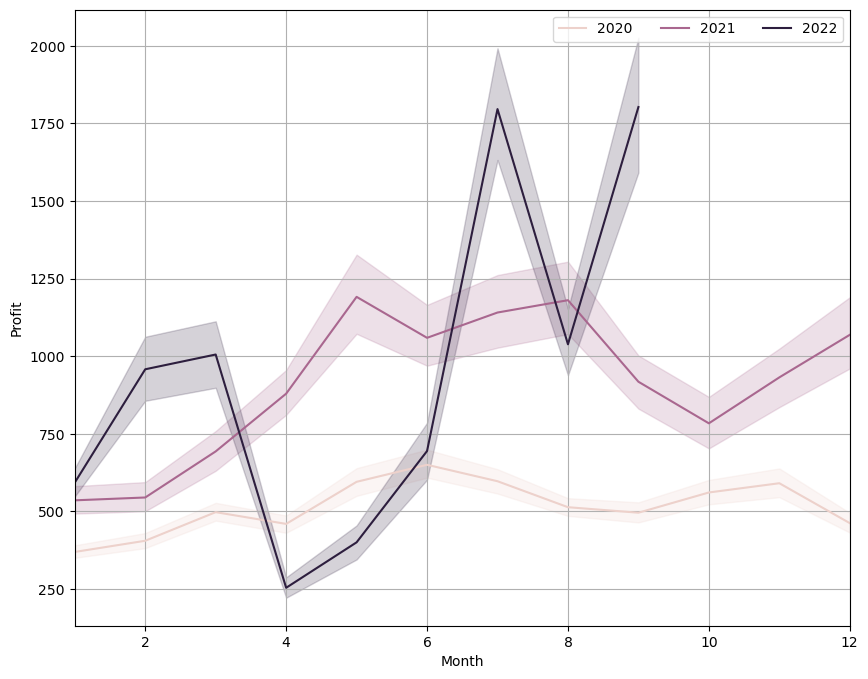

In [37]:
plt.figure(figsize=(10,8))
plt.grid()
sns.lineplot(x="Month", y="Profit",hue = 'Year', data=transactions_df, markers=True)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xlim(1,12) 
plt.show()

In [29]:
df = transactions_df.groupby(['day_of_week','Year']).Profit.sum().reset_index()
df

,day_of_week,Year,Profit
0,0,2020,1695775.31
1,0,2021,1786887.11
2,0,2022,433502.03
3,1,2020,3438571.67
4,1,2021,3817388.38
5,1,2022,878911.19
6,2,2020,2509214.16
7,2,2021,1707152.27
8,2,2022,811426.56
9,3,2020,1740678.02


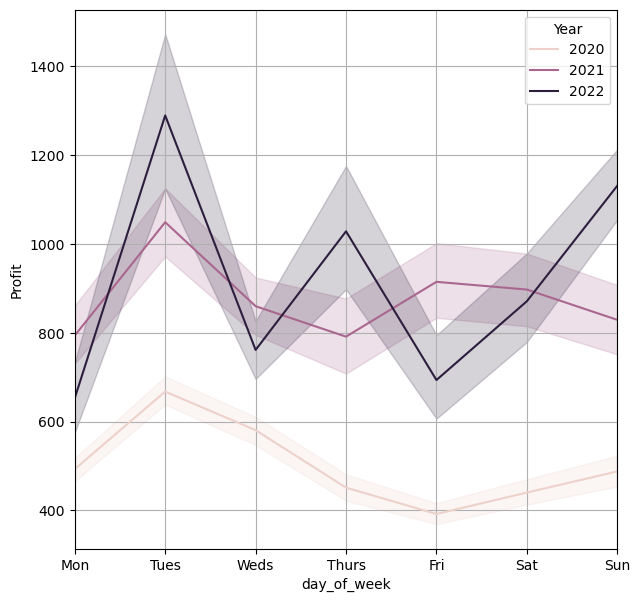

In [43]:
days = ['Mon','Tues','Weds','Thurs','Fri','Sat','Sun']
plt.figure(figsize=(7,7))
plt.grid()
sns.lineplot(x="day_of_week", y="Profit",hue='Year', data=df)
plt.xticks([0, 1, 2,3,4,5,6],days)
plt.xlim(0,6) 
plt.show()

In [23]:
df = transactions_df.groupby(['Year']).Profit.sum().reset_index()
df

,Year,Profit
0,2020,13826545.11
1,2021,14388264.23
2,2022,7129703.14


In [ ]:
transactions_df['quarter'] = pd.PeriodIndex(transactions_df['Date_and_time_of_unloading'], freq='Q')
transactions_df['quarter'] = transactions_df['quarter'].astype(str).str.split('Q').apply(lambda x: x[1])

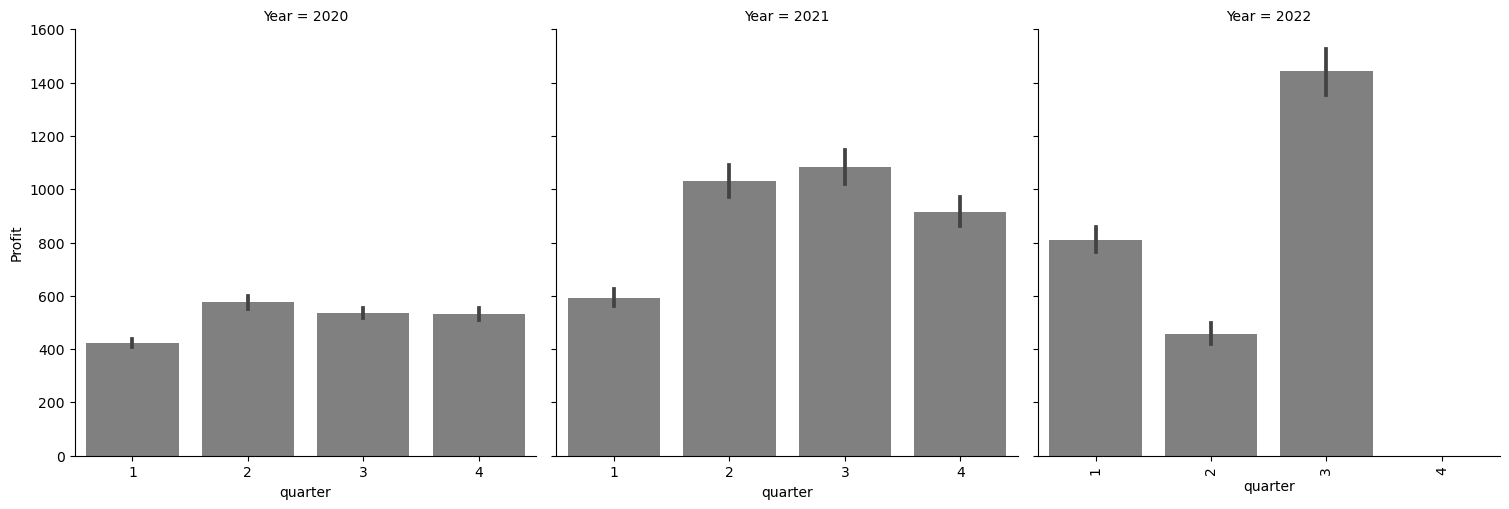

In [87]:
sns.catplot(data=transactions_df, x="quarter", y="Profit",col='Year',kind="bar",color='gray')
plt.xticks(rotation=90)
plt.show()

In [73]:
cat_data = products_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(products_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Vendor_code,Name,Base_unit,Country_of_Origin
missing_percentage,0.0,0.0,0.0,0.0
num_values,272,4830,4,29
value_percentages,"{6.5: 14.4, 'AF Brew': 5.0, 'To Ol': 3.1, 'Zagovor': 3.0, 'Mikkeller': 2.9, 'Jaws': 2.8, 'BrewDo...","{'Kees Barrel Project 19.0.33': 0.1, 'Bakunin Ruka Boga 0.5': 0.0, 'Jaws Populism Idarado Editio...","{'Pieces': 71.2, 'Liters': 28.7, 'Kilogram': 0.0, '100g': 0.0}","{'Russia': 33.0, 6.5: 16.1, 'USA': 7.7, 'Sweden': 7.1, 'Belgium': 6.7, 'Netherlands': 5.2, 'Denm..."


In [74]:
df = products_df.reset_index().groupby('Country_of_Origin').Vendor_code.unique().reset_index(name='vendors')
df['vendors_count'] = df['vendors'].apply(len)
df


,Country_of_Origin,vendors,vendors_count
0,6.5,"[6.5, Snacks, Aurora, Big Village, Brooklyn Brewery, Templars, Red Button, De Noel, Foco, Holy J...",22
1,???,"[The Garage Brewery, 6.5]",2
2,Austria,[Bevog],1
3,Belgium,"[3Fonteine, Alvinne, Anker, Ardenne, BIIR, Mikkeller, Boon, Bosteels, Brabant, Brasserie dOrval,...",52
4,Brazil,[Shimeji Beer],1
5,Canada,"[Collective Arts, Dieu du Ciel, Flying Monkeys, Hopcity]",4
6,China,[Chang],1
7,Croatia,[Dogma],1
8,Czech,[Axiom],1
9,Denmark,"[6.5, Amager, Hornbeer, Mikkeller, Red Button, To OI, To Ol]",7


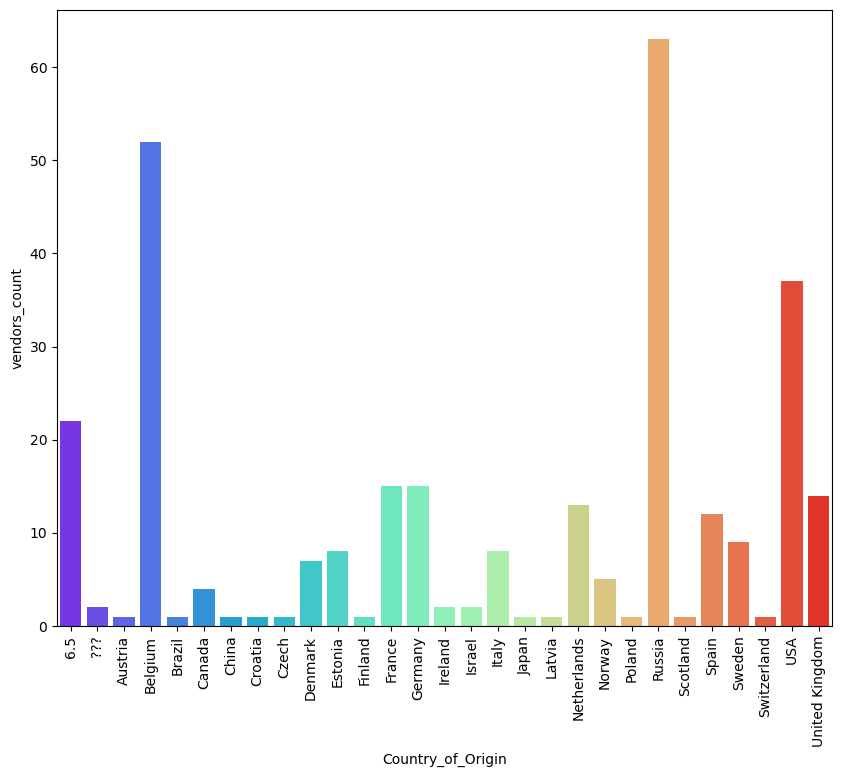

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="vendors_count",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [76]:
big_df = transactions_df.join(products_df, on='Product_code')
big_df

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Month,Year,day_of_week,quarter,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN,1,2020,2,1,AF Brew,"AF Brew Zimnjaja Melanholija Coffee + Vanilla / baltic porter / 7.5% / 0,but.",280.0,Pieces,Russia,0.33,10.3
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03,1,2020,2,1,Pohjala,"Pohjala Mutant Disco / IPA / 6.8% / 0,/ but",420.0,Pieces,Estonia,0.33,6.8
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69,1,2020,2,1,Kerisac,Cider Kerisac Cidre Breton Brut Traditionnel / 4.5% / 1.0l,650.0,Pieces,France,1.00,6.0
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00,1,2020,2,1,Savoie,Cider Savoie Cidre of Apples and Pears Brut / 4.5% / 0.75l,870.0,Pieces,France,0.75,4.5
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02,1,2020,2,1,Bellot,Cider Bellot Cidre de Cru du Pays d’Othe Brut / 5.0% / 0.75l,770.0,Pieces,France,0.75,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50079,2022-09-18 15:00:00,5316,6.0,1875.95,104.05,1095.95,140.51,5.26,9,2022,6,3,Saldens,Saldens Tomato Gose vse versii 0.5,330.0,Pieces,Russia,0.50,5.0
50080,2022-09-18 15:00:00,5317,2.0,555.95,104.05,315.95,131.65,15.77,9,2022,6,3,Saldens,Saldens American IPA 4C 0.5,330.0,Pieces,Russia,0.50,7.0
50081,2022-09-18 15:00:00,5318,2.0,572.50,87.50,312.50,120.19,13.26,9,2022,6,3,Saldens,Saldens Milk Sour Ale Raspberry / Sour Ale Tangerine 0.5,330.0,Pieces,Russia,0.50,5.0
50082,2022-09-18 15:00:00,5321,1.0,300.00,NaN,180.00,150.00,NaN,9,2022,6,3,Steppe & Wind Meadery,Mead Steppe & Wind Cherry Mead 0.33,300.0,Pieces,Russia,0.33,6.0


In [78]:
df = big_df.groupby('Country_of_Origin').Profit.sum().reset_index()
df

,Country_of_Origin,Profit
0,6.5,7073054.46
1,???,110029.49
2,Belgium,2749292.34
3,Brazil,2734.46
4,Canada,53496.79
5,China,11.35
6,Croatia,32906.02
7,Czech,2426.10
8,Denmark,510073.26
9,Estonia,276647.96


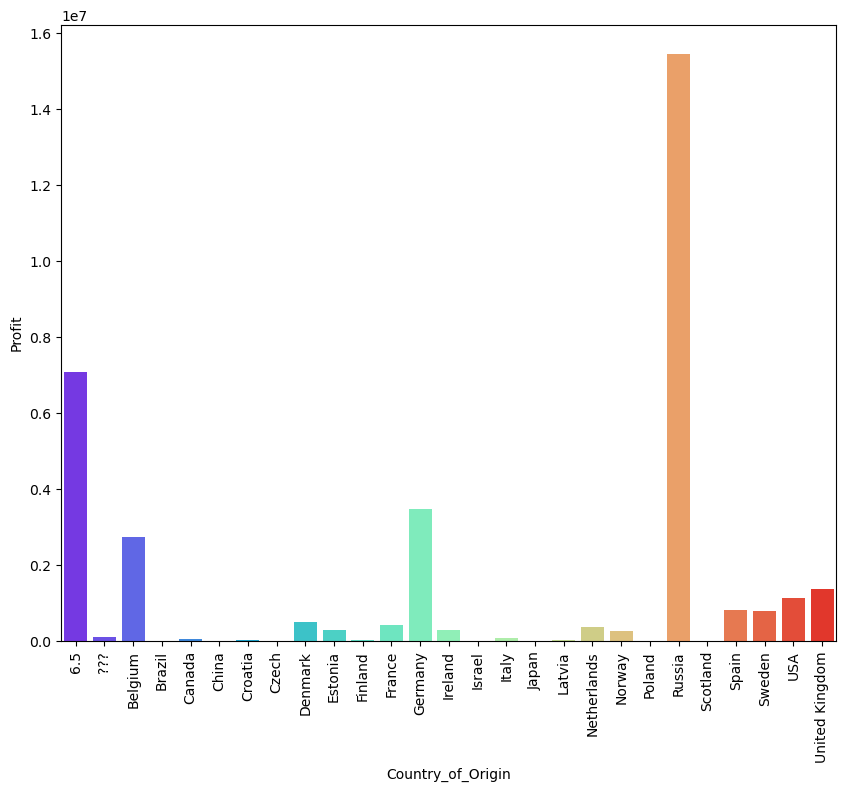

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [82]:
df = big_df.groupby('Country_of_Origin').Profit.sum().reset_index().sort_values(by=['Profit'])
df

,Country_of_Origin,Profit
5,China,11.35
7,Czech,2426.10
20,Poland,2524.00
22,Scotland,2655.76
3,Brazil,2734.46
16,Japan,5038.52
14,Israel,11398.68
17,Latvia,20823.09
10,Finland,24425.20
6,Croatia,32906.02


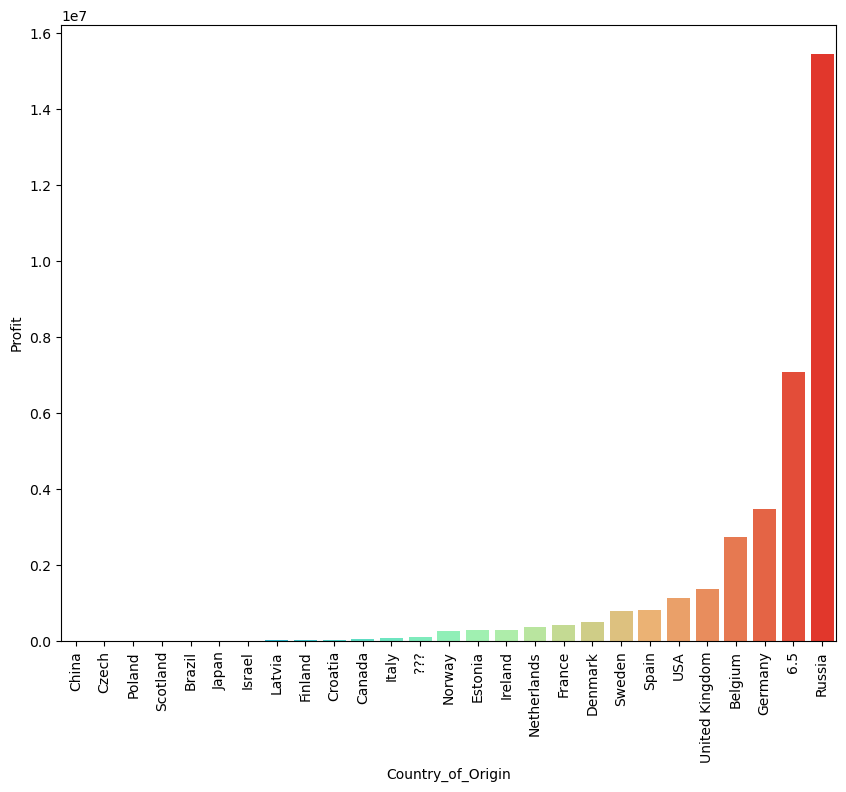

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [84]:
a = products_df[products_df['Country_of_Origin'].isin(df[df.Profit>df.Profit.mean()].Country_of_Origin)]

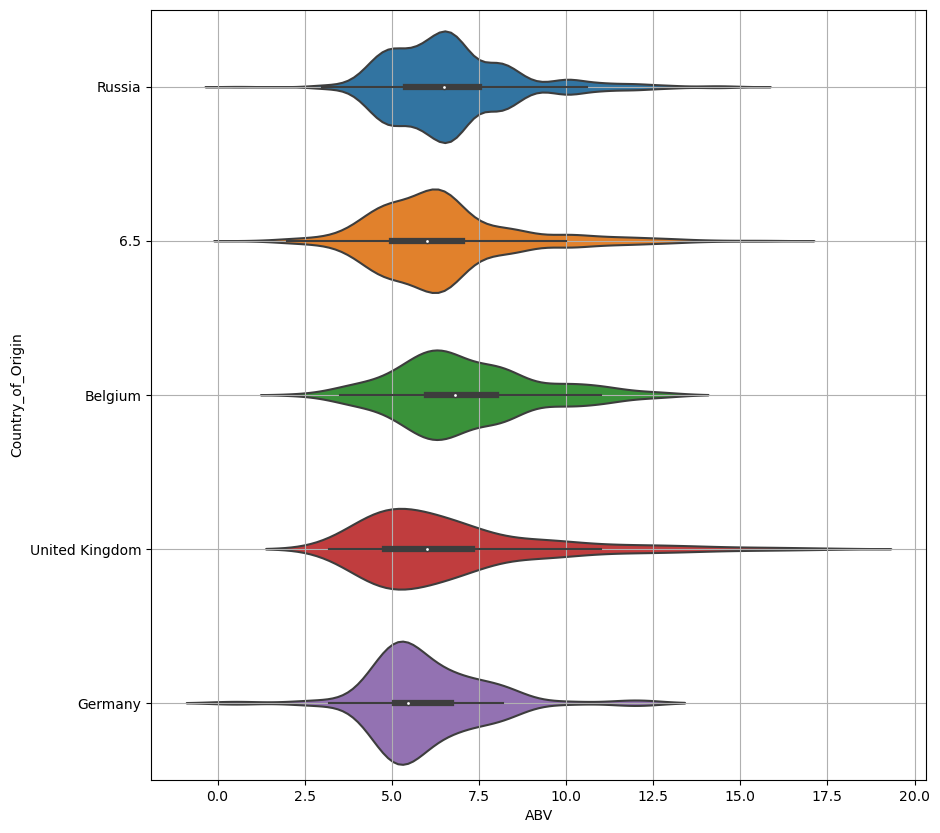

In [85]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="ABV", y="Country_of_Origin")
plt.grid()

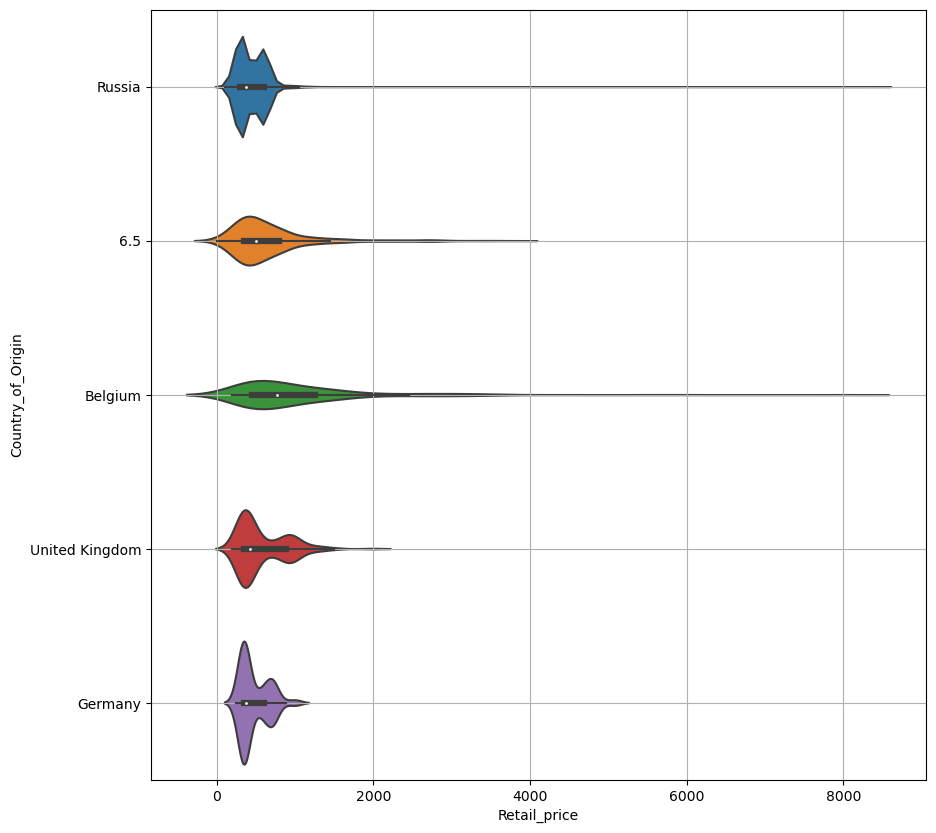

In [88]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="Retail_price", y="Country_of_Origin")
plt.grid()

/home/ngochoa/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


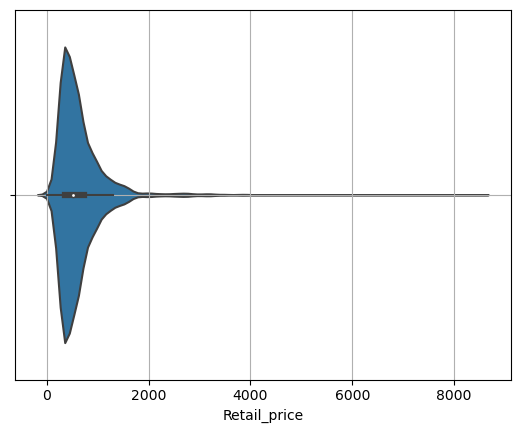

In [89]:
sns.violinplot(products_df["Retail_price"])
plt.grid()

In [91]:
big_df['Vendor_code'].isin(a)

0        False
1        False
2        False
3        False
4        False
         ...  
50079    False
50080    False
50081    False
50082    False
50083    False
Name: Vendor_code, Length: 50084, dtype: bool

In [94]:
df = big_df.groupby('Vendor_code').Profit.sum().reset_index().sort_values(by=['Profit'])
df

,Vendor_code,Profit
93,Finback,-3194.48
62,Christian Drouin,-1100.00
118,High Water,-865.00
196,Templars,-609.74
204,Toccalmatto,-165.63
...,...,...
227,Zagovor,1390965.87
217,Weihenstephaner,1581440.48
4,AF Brew,1793918.51
129,Jaws,3326954.72


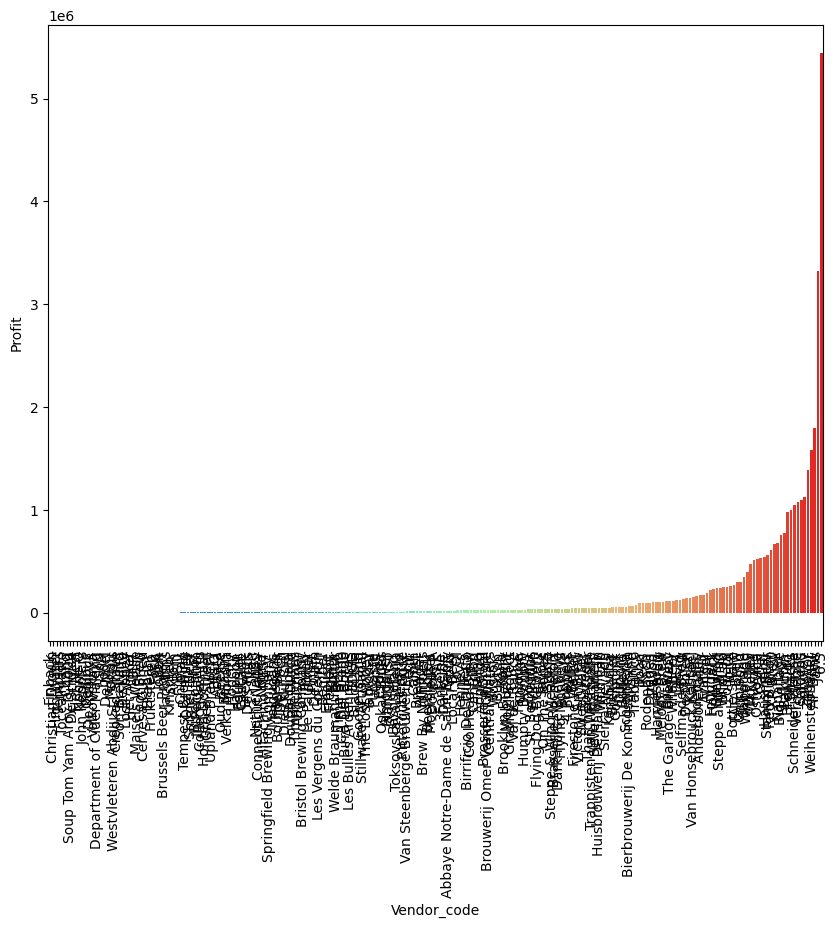

In [95]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Vendor_code", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

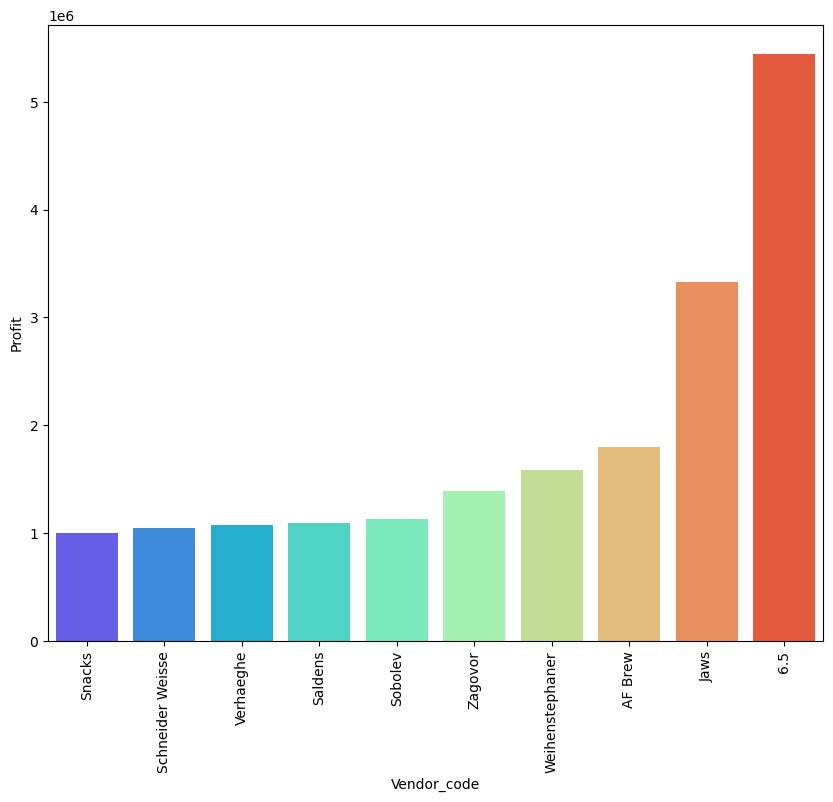

In [96]:
plt.figure(figsize=(10,8))
sns.barplot(data=df.tail(10), x="Vendor_code", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [97]:
a = products_df[products_df['Vendor_code'].isin(df.tail(5).Vendor_code)]
a

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
5028,6.5,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
4846,6.5,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
1340,6.5,1000 IBU Imperial IPA Barrel l,960.0,Liters,6.5,1.000,9.6
4302,6.5,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5
4304,6.5,18th Street Brewery Pins And Needles 0.473,630.0,Pieces,USA,0.473,8.5
...,...,...,...,...,...,...,...
4693,6.5,Simbioz Vienna Stout 0.5,330.0,Pieces,6.5,0.500,8.5
868,6.5,Spagetti Vestern,880.0,Liters,6.5,1.000,8.7
1861,6.5,Stoun Imperial Rashn Stout Barrel l,1200.0,Liters,6.5,1.000,10.8


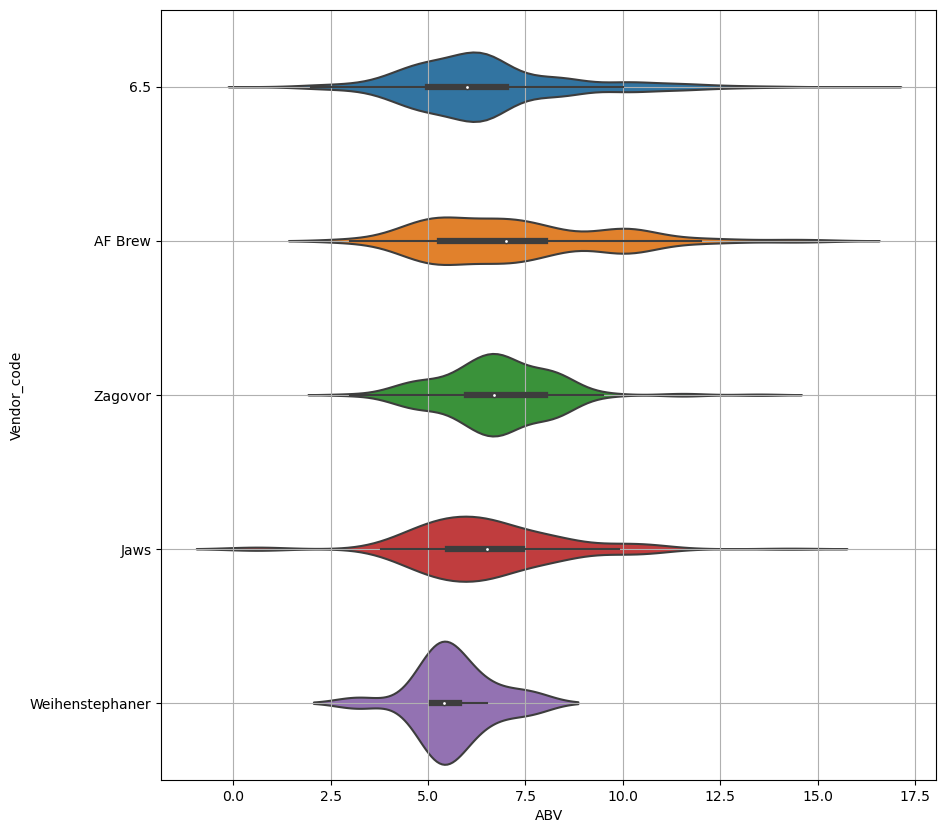

In [98]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="ABV", y="Vendor_code")
plt.grid()

In [99]:
a.reset_index().groupby('Vendor_code').count()

,Product_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Vendor_code,,,,,,,
6.5,702,702,702,702,702,702,702
AF Brew,242,242,242,242,242,242,242
Jaws,135,135,135,135,135,135,135
Weihenstephaner,17,17,17,17,17,17,17
Zagovor,147,147,147,147,147,147,147


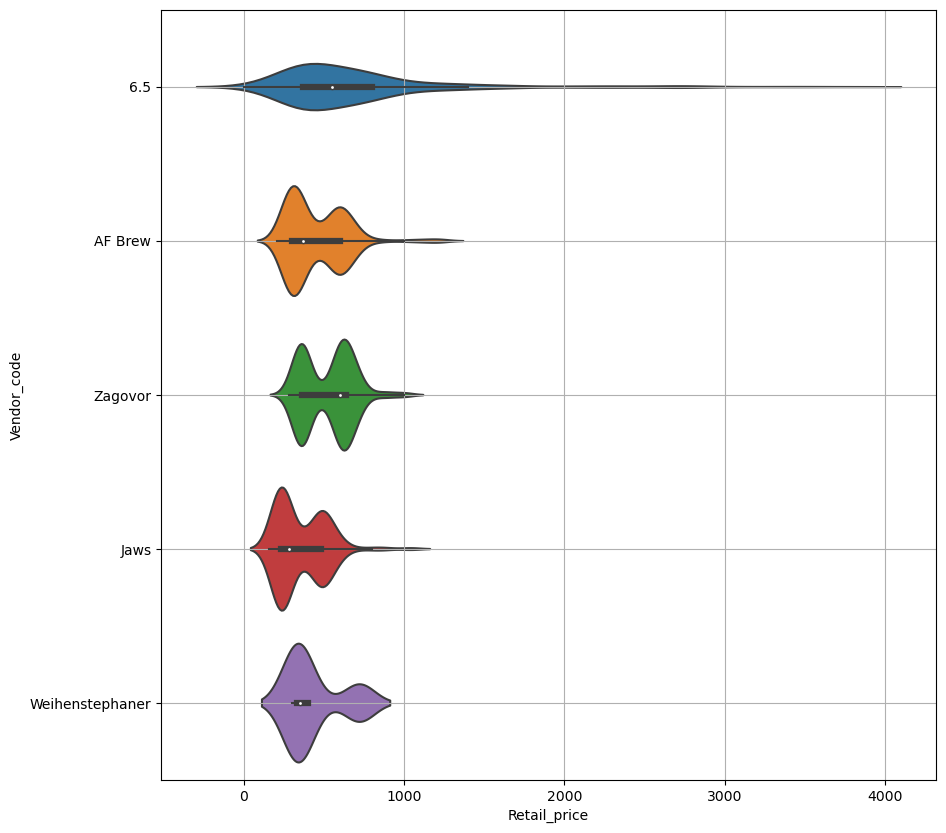

In [100]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="Retail_price", y="Vendor_code")
plt.grid()

In [101]:
df = big_df[big_df['Country_of_Origin']=='Russia'].groupby('Vendor_code').Profit.sum().reset_index().sort_values('Profit')